# Rain Gauge Quality Comparison - Research Grade Rain Gauges

## Import libraries

In [35]:
import numpy as np
import pandas as pd
import xarray as xr 
import os
import matplotlib.pyplot as plt

## Import NovaLynx Data

In [4]:
novalynx_files = "C:/Users/maggi/ANL_Internship_2023/NovaLynx_12in_Rain_Gauge/data/*.nc"

In [5]:
novalynx_ds = xr.open_mfdataset(novalynx_files)

## Plot NovaLynx Data

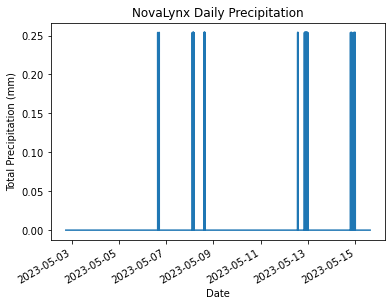

In [25]:
novalynx_precip = novalynx_ds.tb_rain_mm_Tot
novalynx_precip.plot()
plt.title('NovaLynx Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

## Plot NovaLynx Accumulated Precipitation

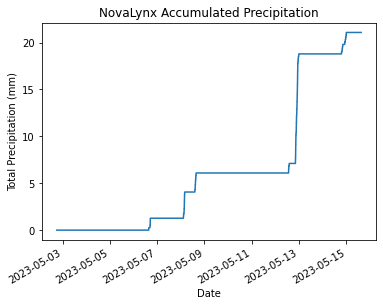

In [14]:
accumulated_novalynx_precip = np.cumsum(novalynx_precip)
accumulated_novalynx_precip.plot()
plt.title('NovaLynx Accumulated Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

## Plotting NovaLynx Data for a Specific Case

### Select Start and End Time

In [15]:
start_date = '2023-05-08 00:000:00'
end_date = '2023-05-09 00:00:00'

Text(0, 0.5, 'Total Precipitation (mm)')

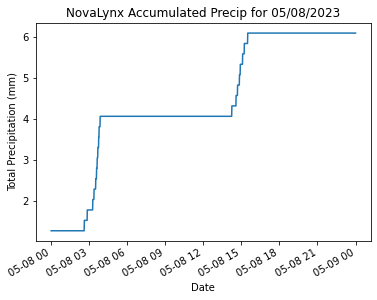

In [20]:
accum_novalynx_subset = accumulated_novalynx_precip.sel(time=slice(start_date, end_date))
accum_novalynx_subset.plot()
plt.title('NovaLynx Accumulated Precip for 05/08/2023')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

## Import ORG/APG Data

In [21]:
ORGAPG_files = "C:/Users/maggi/ANL_Internship_2023/ORG_APG/ORG_APG_data/*.nc"

In [23]:
ORGAPG_ds = xr.open_mfdataset(ORGAPG_files)

## Plot ORG/APG Data

### ORG Data

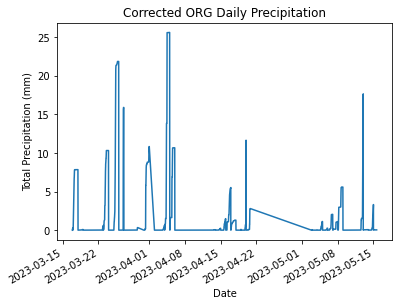

In [29]:
ORG_precip = np.clip(ORGAPG_ds.corr_precip_ORG, 0, None)
ORG_precip.plot()
plt.title('Corrected ORG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### APG Data

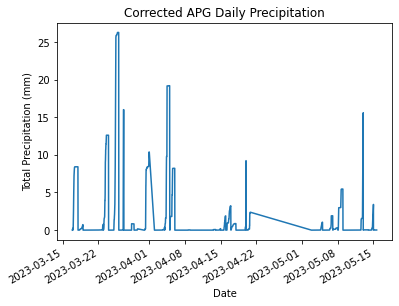

In [30]:
APG_precip = np.clip(ds.corr_precip_APG, 0, None)
APG_precip.plot()
plt.title('Corrected APG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

## Plotting ORG/APG Data for a Specific Case

### ORG Data

Text(0, 0.5, 'Total Precipitation (mm)')

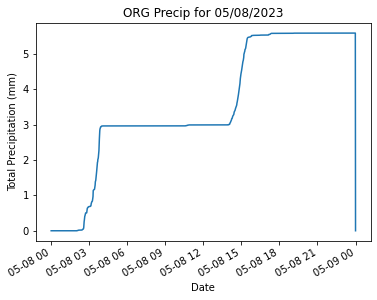

In [31]:
ORG_precip_subset = ORG_precip.sel(time=slice(start_date, end_date))
ORG_precip_subset.plot()
plt.title('ORG Precip for 05/08/2023')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

### APG Data

Text(0, 0.5, 'Total Precipitation (mm)')

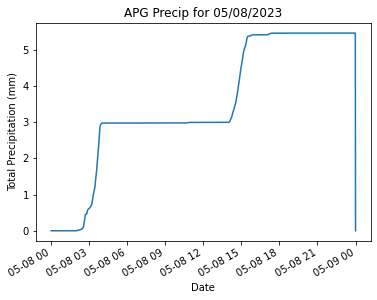

In [32]:
APG_precip_subset = APG_precip.sel(time=slice(start_date, end_date))
APG_precip_subset.plot()
plt.title('APG Precip for 05/08/2023')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

## Import Tower 8in Rain Gauge Data

In [33]:
tower_datafiles = datafiles = "C:/Users/maggi/ANL_Internship_2023/Tower_Rain_Gauge/tower_data/"

In [36]:
sortedfiles = os.listdir(tower_datafiles)
opened_files = []
for files in sorted(sortedfiles):
    if '.nc' in files:
        merged_path=os.path.join(datafiles,files)
        data=xr.open_dataset(merged_path)
        opened_files.append(data)

In [37]:
tower_ds = xr.concat(opened_files, dim = 'time')

## Plot Tower Data

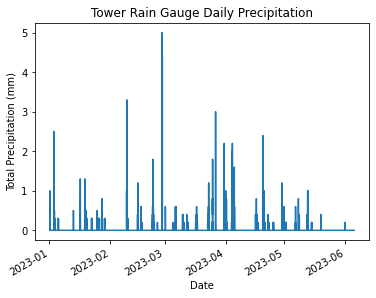

In [40]:
tower_precip = tower_ds.precip
tower_precip.plot()
plt.title('Tower Rain Gauge Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

Text(0, 0.5, 'Total Precipitation (mm)')

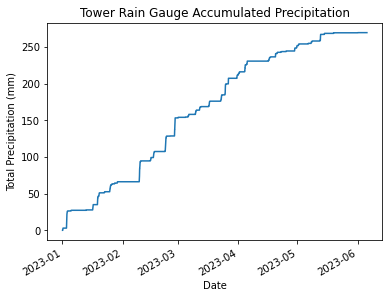

In [41]:
accumulated_tower_precip = np.cumsum(tower_precip)
accumulated_tower_precip.plot()
plt.title('Tower Rain Gauge Accumulated Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

## Plotting Tower Rain Gauge Data for a Specific Case

In [46]:
#tower_precip_subset = tower_precip.sel(time=slice(start_date, end_date))
#tower_precip_subset.plot()
#plt.title('Tower Rain Gauge Precip for 05/08/2023')
#plt.xlabel('Date')
#plt.ylabel('Total Precipitation (mm)')

# This is not working for the time being, working on figuring out the time indexing for this dataset. Coming soon!

## Import FD70 Data

In [48]:
FD70_data = "C:/Users/maggi/ANL_Internship_2023/FD70_Rain_Gauge/FD70_data/*.nc"
FD70_ds = xr.open_mfdataset(FD70_data)

C:\Users\maggi\anaconda3\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


## Plot FD70 Data

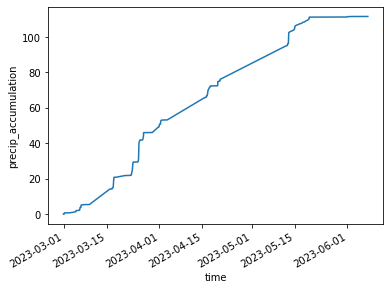

In [50]:
FD70_precip = FD70_ds.precip_accumulation-FD70_ds.precip_accumulation[0]
FD70_precip.plot()

## Plotting FD70 Data for a Specific Case

Text(0, 0.5, 'Total Precipitation (mm)')

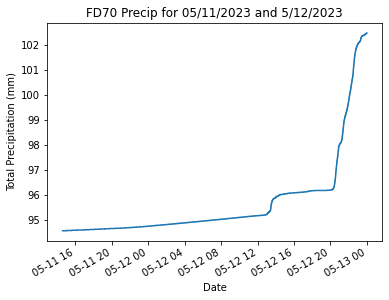

In [57]:
FD70_precip_subset = FD70_precip.sel(time=slice('2023-05-11', '2023-05-12'))
FD70_precip_subset.plot()
plt.title('FD70 Precip for 05/11/2023 and 5/12/2023')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

Disclaimer: The FD70 was reporting precipitation when precipitation was not occurring. I chose a different date for this example (not 5/08/23) due to errors I was getting. This data will be more reliable after 6/22/23 as the FD70 windows were cleaned. I will update this notebook after the rainfall event on 6/25/23, and set that as the example case for each rain gauge.